In [1]:
from scipy.io import loadmat
from scipy.io import savemat
from scipy.stats import kurtosis, skew, entropy
from scipy import signal
import pandas as pd
import numpy as np

mdata = loadmat('dataset/sample_wave.mat')['sample_wave']

Fs = 256
t_range = np.arange(0, 4, 1/Fs)
f_range = np.arange(0, 128, 0.25)
blink_types = mdata.dtype.names # voluntary & involuntary

feature_names = [
    'fp1_mean',
    'fp1_median',
    'fp1_min',
    'fp1_max',
    'fp1_std',
    'fp1_var',
    'fp1_range',
    'fp1_kurtosis',
    'fp1_skew',
    'fp1_entropy',
    'fp2_mean',
    'fp2_median',
    'fp2_min',
    'fp2_max',
    'fp2_std',
    'fp2_var',
    'fp2_range',
    'fp2_kurtosis',
    'fp2_skew',
    'fp2_entropy',


    'fp1_delta_mean',
    'fp1_delta_min',
    'fp1_delta_max',
    'fp1_delta_range',
    'fp1_theta_mean',
    # 'fp1_theta_min',
    # 'fp1_theta_max',
    # 'fp1_theta_range',
    # 'fp1_alpha_mean',
    # 'fp1_beta_mean',
    # 'fp1_gamma_mean',
    'fp2_delta_mean',
    'fp2_delta_min',
    'fp2_delta_max',
    'fp2_delta_range',
    'fp2_theta_mean',
    # 'fp2_theta_min',
    # 'fp2_theta_max',
    # 'fp2_theta_range',
    # 'fp2_alpha_mean',
    # 'fp2_beta_mean',
    # 'fp2_gamma_mean',
    'blink'
]
eeg_bands = {'delta': (0, 4),
             'theta': (4, 8),
             'alpha': (8, 12),
             'beta': (12, 30),
             'gamma': (30, 45)}
features = pd.DataFrame(columns=feature_names)
features['blink'] = features['blink'].astype(int)

for blink_type in blink_types:

    signals = mdata[blink_type][0,0]
    epochs = signals.dtype.names # individual epoch struct

    for epoch in epochs:
        fp1 = signals[epoch][0,0][0]
        fp2 = signals[epoch][0,0][1]


        hist_fp1 = np.histogram(fp1, bins=100, density=True)[0]
        hist_fp1 += 1e-12
        hist_fp2 = np.histogram(fp2, bins=100, density=True)[0]
        hist_fp2 += 1e-12

        f, psd = signal.welch(fp1, Fs, nperseg=1024)

        psd = 10 * np.log10(psd)

        f_delta_indices = np.where((f >= eeg_bands['delta'][0]) & (f < eeg_bands['delta'][1]))
        f_theta_indices = np.where((f >= eeg_bands['theta'][0]) & (f < eeg_bands['theta'][1]))
        f_alpha_indices = np.where((f >= eeg_bands['alpha'][0]) & (f < eeg_bands['alpha'][1]))
        f_beta_indices = np.where((f >= eeg_bands['beta'][0]) & (f < eeg_bands['beta'][1]))
        f_gamma_indices = np.where((f >= eeg_bands['gamma'][0]) & (f < eeg_bands['gamma'][1]))

        fp1_delta_mean = np.mean(psd[f_delta_indices])
        fp1_delta_min = np.min(psd[f_delta_indices])
        fp1_delta_max = np.max(psd[f_delta_indices])
        fp1_delta_range = fp1_delta_max - fp1_delta_min

        fp1_theta_mean = np.mean(psd[f_theta_indices])
        fp1_theta_min = np.min(psd[f_theta_indices])
        fp1_theta_max = np.max(psd[f_theta_indices])
        fp1_theta_range = fp1_theta_max - fp1_theta_min

        fp1_alpha_mean = np.mean(psd[f_alpha_indices])
        fp1_beta_mean = np.mean(psd[f_beta_indices])
        fp1_gamma_mean = np.mean(psd[f_gamma_indices])

        f, psd = signal.welch(fp2, Fs, nperseg=1024)
        f_delta_indices = np.where((f >= eeg_bands['delta'][0]) & (f < eeg_bands['delta'][1]))
        f_theta_indices = np.where((f >= eeg_bands['theta'][0]) & (f < eeg_bands['theta'][1]))
        f_alpha_indices = np.where((f >= eeg_bands['alpha'][0]) & (f < eeg_bands['alpha'][1]))
        f_beta_indices = np.where((f >= eeg_bands['beta'][0]) & (f < eeg_bands['beta'][1]))
        f_gamma_indices = np.where((f >= eeg_bands['gamma'][0]) & (f < eeg_bands['gamma'][1]))

        fp2_delta_mean = np.mean(psd[f_delta_indices])
        fp2_delta_min = np.min(psd[f_delta_indices])
        fp2_delta_max = np.max(psd[f_delta_indices])
        fp2_delta_range = fp2_delta_max - fp2_delta_min

        fp2_theta_mean = np.mean(psd[f_theta_indices])
        fp2_theta_min = np.min(psd[f_theta_indices])
        fp2_theta_max = np.max(psd[f_theta_indices])
        fp2_theta_range = fp2_theta_max - fp2_theta_min

        fp2_alpha_mean = np.mean(psd[f_alpha_indices])
        fp2_beta_mean = np.mean(psd[f_beta_indices])
        fp2_gamma_mean = np.mean(psd[f_gamma_indices])

        new_record = {
            'fp1_mean': np.mean(fp1),
            'fp1_median': np.median(fp1),
            'fp1_min': np.min(fp1),
            'fp1_max': np.max(fp1),
            'fp1_std': np.std(fp1),
            'fp1_var': np.var(fp1),
            'fp1_range': np.max(fp1)- np.min(fp1),
            'fp1_kurtosis': kurtosis(fp1),
            'fp1_skew': skew(fp1),
            'fp1_entropy': entropy(hist_fp1),
            'fp2_mean': np.mean(fp2),
            'fp2_median': np.median(fp2),
            'fp2_min': np.min(fp2),
            'fp2_max': np.max(fp2),
            'fp2_std': np.std(fp2),
            'fp2_var': np.var(fp2),
            'fp2_range': np.max(fp2)- np.min(fp2),
            'fp2_kurtosis': kurtosis(fp2),
            'fp2_skew': skew(fp2),
            'fp2_entropy': entropy(hist_fp2),

            'fp1_delta_mean': fp1_delta_mean,
            'fp1_delta_min': fp1_delta_min,
            'fp1_delta_max': fp1_delta_max,
            'fp1_delta_range': fp1_delta_range,
            'fp1_theta_mean': fp1_theta_mean,
            # 'fp1_theta_min': fp1_delta_min,
            # 'fp1_theta_max': fp1_delta_max,
            # 'fp1_theta_range': fp1_delta_range,
            # 'fp1_alpha_mean': fp1_alpha_mean,
            # 'fp1_beta_mean': fp1_beta_mean,
            # 'fp1_gamma_mean': fp1_gamma_mean,
            'fp2_delta_mean': fp2_delta_mean,
            'fp2_delta_min': fp2_delta_min,
            'fp2_delta_max': fp2_delta_max,
            'fp2_delta_range': fp2_delta_range,
            'fp2_theta_mean': fp2_theta_mean,
            # 'fp2_theta_min': fp2_delta_min,
            # 'fp2_theta_max': fp2_delta_max,
            # 'fp2_theta_range': fp2_delta_range,
            # 'fp2_alpha_mean': fp2_alpha_mean,
            # 'fp2_beta_mean': fp2_beta_mean,
            # 'fp2_gamma_mean': fp2_gamma_mean,
            'blink': int(1) if blink_type == 'voluntary' else int(0),
        }
        features = pd.concat([features, pd.DataFrame([new_record])], ignore_index=True)


In [2]:
features.to_pickle("features.pkl")
features

,fp1_mean,fp1_median,fp1_min,fp1_max,fp1_std,fp1_var,fp1_range,fp1_kurtosis,fp1_skew,fp1_entropy,...,fp1_delta_min,fp1_delta_max,fp1_delta_range,fp1_theta_mean,fp2_delta_mean,fp2_delta_min,fp2_delta_max,fp2_delta_range,fp2_theta_mean,blink
0,0.019418,0.570297,-153.152054,159.161428,38.554358,1486.438554,312.313482,7.298035,-0.549411,3.126100,...,-37.182341,23.691131,60.873472,-4.947552,43.533272,0.000221,270.610774,270.610553,0.611648,1
1,0.035894,0.484288,-96.534364,134.752058,26.791295,717.773509,231.286422,9.168062,0.519797,3.177551,...,-25.017779,21.432561,46.450340,-4.711949,22.816111,0.003643,160.874791,160.871148,0.857499,1
2,-0.166985,1.006762,-106.343849,113.392582,26.042569,678.215396,219.736431,8.007002,-0.336855,3.154486,...,-14.808454,21.820627,36.629081,-1.697611,24.783825,0.038228,175.911650,175.873422,1.410353,1
3,-0.331847,0.188234,-105.302602,115.957580,28.010427,784.584047,221.260182,5.830864,-0.359368,3.354138,...,-4.678644,24.266174,28.944818,-5.173714,46.858358,0.393883,308.922322,308.528438,0.470305,1
4,0.019691,0.748899,-105.534091,118.844261,27.177089,738.594188,224.378352,7.226644,-0.425924,3.166384,...,-54.378764,22.367570,76.746334,-4.527725,28.892254,0.000004,199.521143,199.521139,0.688159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,-0.075876,0.393187,-80.309467,120.125675,25.623107,656.543608,200.435142,5.489655,0.333219,3.478472,...,-12.756808,23.541373,36.298181,-1.486205,36.332847,0.055045,234.714028,234.658982,1.003232,0
857,0.293096,0.044543,-103.551569,142.618844,29.469183,868.432769,246.170413,8.273008,0.383580,3.184800,...,-9.381979,21.327081,30.709060,-2.103695,21.331765,0.119730,140.964519,140.844789,0.884960,0
858,-0.456375,1.613479,-132.117488,123.142924,36.294150,1317.265358,255.260412,4.590602,-0.763368,3.454406,...,-1.426938,27.296755,28.723694,-1.679138,76.167057,0.747666,557.284893,556.537226,0.809334,0
859,-0.276722,0.266537,-69.893409,79.104371,19.541324,381.863331,148.997780,4.228456,-0.218180,3.592637,...,-17.087909,22.760317,39.848225,-4.362414,24.586609,0.020305,196.080046,196.059741,0.631763,0


In [3]:
print(features.dtypes)

fp1_mean           float64
fp1_median         float64
fp1_min            float64
fp1_max            float64
fp1_std            float64
fp1_var            float64
fp1_range          float64
fp1_kurtosis       float64
fp1_skew           float64
fp1_entropy        float64
fp2_mean           float64
fp2_median         float64
fp2_min            float64
fp2_max            float64
fp2_std            float64
fp2_var            float64
fp2_range          float64
fp2_kurtosis       float64
fp2_skew           float64
fp2_entropy        float64
fp1_delta_mean     float64
fp1_delta_min      float64
fp1_delta_max      float64
fp1_delta_range    float64
fp1_theta_mean     float64
fp2_delta_mean     float64
fp2_delta_min      float64
fp2_delta_max      float64
fp2_delta_range    float64
fp2_theta_mean     float64
blink                int64
dtype: object


In [4]:
train_x = features.loc[:, features.columns != 'blink']
train_y = features.loc[:, features.columns == 'blink']

In [5]:
from sklearn import preprocessing

def normalize_mms(input_df):
    scaler = preprocessing.MinMaxScaler()
    result = scaler.fit_transform(input_df)
    return pd.DataFrame(result, index=input_df.index, columns=input_df.columns)

# train_x = normalize_mms(train_x)
train_x

,fp1_mean,fp1_median,fp1_min,fp1_max,fp1_std,fp1_var,fp1_range,fp1_kurtosis,fp1_skew,fp1_entropy,...,fp1_delta_mean,fp1_delta_min,fp1_delta_max,fp1_delta_range,fp1_theta_mean,fp2_delta_mean,fp2_delta_min,fp2_delta_max,fp2_delta_range,fp2_theta_mean
0,0.019418,0.570297,-153.152054,159.161428,38.554358,1486.438554,312.313482,7.298035,-0.549411,3.126100,...,7.033774,-37.182341,23.691131,60.873472,-4.947552,43.533272,0.000221,270.610774,270.610553,0.611648
1,0.035894,0.484288,-96.534364,134.752058,26.791295,717.773509,231.286422,9.168062,0.519797,3.177551,...,5.218447,-25.017779,21.432561,46.450340,-4.711949,22.816111,0.003643,160.874791,160.871148,0.857499
2,-0.166985,1.006762,-106.343849,113.392582,26.042569,678.215396,219.736431,8.007002,-0.336855,3.154486,...,5.227290,-14.808454,21.820627,36.629081,-1.697611,24.783825,0.038228,175.911650,175.873422,1.410353
3,-0.331847,0.188234,-105.302602,115.957580,28.010427,784.584047,221.260182,5.830864,-0.359368,3.354138,...,6.563926,-4.678644,24.266174,28.944818,-5.173714,46.858358,0.393883,308.922322,308.528438,0.470305
4,0.019691,0.748899,-105.534091,118.844261,27.177089,738.594188,224.378352,7.226644,-0.425924,3.166384,...,3.398599,-54.378764,22.367570,76.746334,-4.527725,28.892254,0.000004,199.521143,199.521139,0.688159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,-0.075876,0.393187,-80.309467,120.125675,25.623107,656.543608,200.435142,5.489655,0.333219,3.478472,...,5.563258,-12.756808,23.541373,36.298181,-1.486205,36.332847,0.055045,234.714028,234.658982,1.003232
857,0.293096,0.044543,-103.551569,142.618844,29.469183,868.432769,246.170413,8.273008,0.383580,3.184800,...,5.818816,-9.381979,21.327081,30.709060,-2.103695,21.331765,0.119730,140.964519,140.844789,0.884960
858,-0.456375,1.613479,-132.117488,123.142924,36.294150,1317.265358,255.260412,4.590602,-0.763368,3.454406,...,8.963914,-1.426938,27.296755,28.723694,-1.679138,76.167057,0.747666,557.284893,556.537226,0.809334
859,-0.276722,0.266537,-69.893409,79.104371,19.541324,381.863331,148.997780,4.228456,-0.218180,3.592637,...,4.096523,-17.087909,22.760317,39.848225,-4.362414,24.586609,0.020305,196.080046,196.059741,0.631763


C:\Software\anaconda3\envs\bcifinal1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train acc: 0.7659883720930233
[[230  83]
 [ 78 297]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       313
           1       0.78      0.79      0.79       375

    accuracy                           0.77       688
   macro avg       0.76      0.76      0.76       688
weighted avg       0.77      0.77      0.77       688


Test acc: 0.7225433526011561
[[56 25]
 [23 69]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        81
           1       0.73      0.75      0.74        92

    accuracy                           0.72       173
   macro avg       0.72      0.72      0.72       173
weighted avg       0.72      0.72      0.72       173



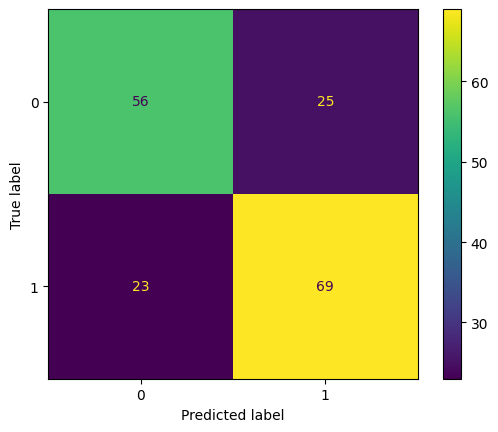

In [6]:
import sys
sys.path.append("../../function")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier
from function import classification

LR = LogisticRegression(random_state=42)
LR = classification.model_training(train_x, train_y.values.ravel(), LR)

C:\Users\Edwin Sanjaya\DataspellProjects\bci-finalproject\function\classification.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Train acc: 1.0
[[313   0]
 [  0 375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       375

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688


Test acc: 0.7109826589595376
[[56 25]
 [25 67]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        81
           1       0.73      0.73      0.73        92

    accuracy                           0.71       173
   macro avg       0.71      0.71      0.71       173
weighted avg       0.71      0.71      0.71       173



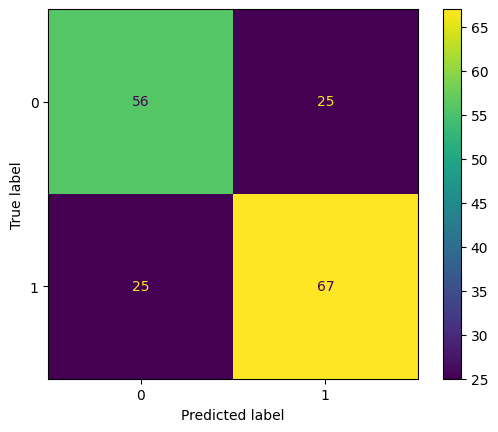

In [7]:
RF = RandomForestClassifier(random_state=42)
RF = classification.model_training(train_x, train_y, RF)

Train acc: 0.7223837209302325
[[222  91]
 [100 275]]
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       313
           1       0.75      0.73      0.74       375

    accuracy                           0.72       688
   macro avg       0.72      0.72      0.72       688
weighted avg       0.72      0.72      0.72       688


Test acc: 0.6473988439306358
[[55 26]
 [35 57]]
              precision    recall  f1-score   support

           0       0.61      0.68      0.64        81
           1       0.69      0.62      0.65        92

    accuracy                           0.65       173
   macro avg       0.65      0.65      0.65       173
weighted avg       0.65      0.65      0.65       173



C:\Software\anaconda3\envs\bcifinal1\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


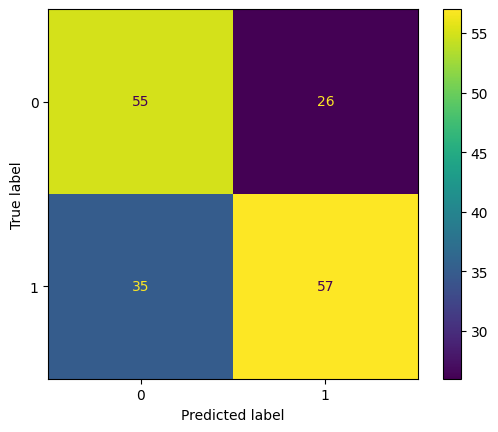

In [8]:
SVM = SVC(random_state=42)
SVM = classification.model_training(train_x, train_y, SVM)

Train acc: 1.0
[[313   0]
 [  0 375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       375

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688


Test acc: 0.7225433526011561
[[56 25]
 [23 69]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        81
           1       0.73      0.75      0.74        92

    accuracy                           0.72       173
   macro avg       0.72      0.72      0.72       173
weighted avg       0.72      0.72      0.72       173



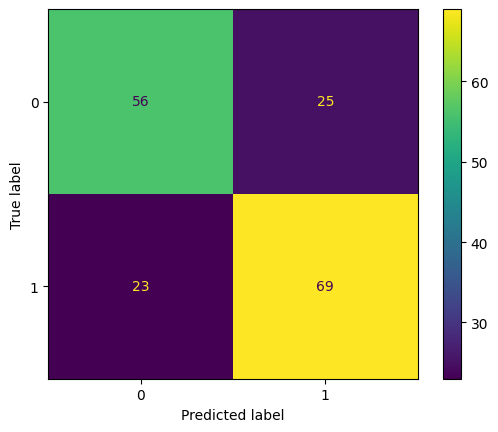

In [9]:
XGB = XGBClassifier()
XGB = classification.model_training(train_x, train_y, XGB)

Train acc: 0.9302325581395349
[[300  13]
 [ 35 340]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       313
           1       0.96      0.91      0.93       375

    accuracy                           0.93       688
   macro avg       0.93      0.93      0.93       688
weighted avg       0.93      0.93      0.93       688


Test acc: 0.7109826589595376
[[57 24]
 [26 66]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.70        81
           1       0.73      0.72      0.73        92

    accuracy                           0.71       173
   macro avg       0.71      0.71      0.71       173
weighted avg       0.71      0.71      0.71       173



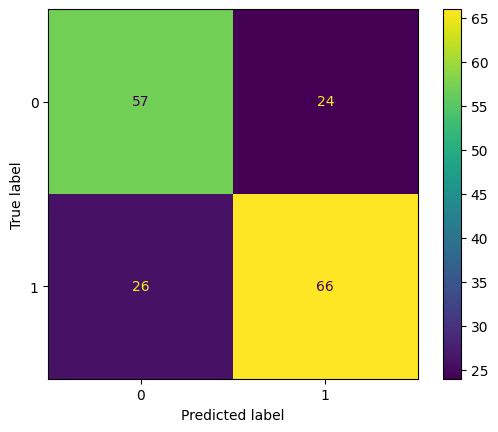

In [10]:
XGBRF = XGBRFClassifier()
XGBRF = classification.model_training(train_x, train_y, XGBRF)

Index(['fp1_mean', 'fp1_median', 'fp1_min', 'fp1_max', 'fp1_std', 'fp1_var',
       'fp1_range', 'fp1_kurtosis', 'fp1_skew', 'fp1_entropy', 'fp2_mean',
       'fp2_median', 'fp2_min', 'fp2_max', 'fp2_std', 'fp2_var', 'fp2_range',
       'fp2_kurtosis', 'fp2_skew', 'fp2_entropy', 'fp1_delta_mean',
       'fp1_delta_min', 'fp1_delta_max', 'fp1_delta_range', 'fp1_theta_mean',
       'fp2_delta_mean', 'fp2_delta_min', 'fp2_delta_max', 'fp2_delta_range',
       'fp2_theta_mean'],
      dtype='object')
[ True False  True  True False False  True  True False  True  True False
  True  True False  True  True  True  True  True  True  True False False
 False False  True False False  True]
[1 2 1 1 2 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 1]


C:\Users\Edwin Sanjaya\DataspellProjects\bci-finalproject\function\classification.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Train acc: 1.0
[[313   0]
 [  0 375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       375

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688


Test acc: 0.7109826589595376
[[55 26]
 [24 68]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        81
           1       0.72      0.74      0.73        92

    accuracy                           0.71       173
   macro avg       0.71      0.71      0.71       173
weighted avg       0.71      0.71      0.71       173



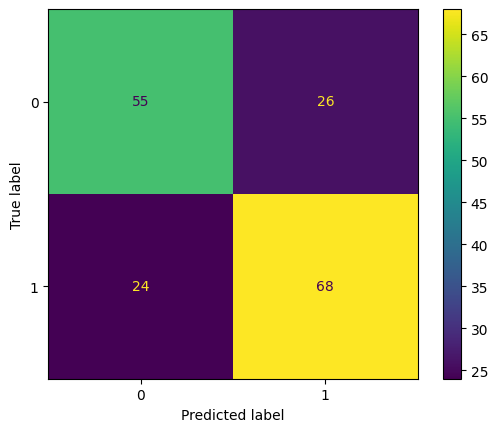

In [11]:
rfe_model = RF

rfe_columns = classification.RFE_analysis(train_x, train_y, rfe_model, n_feature_to_select=0.6)
train_x_rfe = train_x[train_x.columns[rfe_columns]]
rfe_model = classification.model_training(train_x_rfe, train_y, rfe_model)

In [12]:
rfe_columns

array([ 0,  2,  3,  6,  7,  9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 26,
       29], dtype=int64)

In [13]:
train_x.columns

Index(['fp1_mean', 'fp1_median', 'fp1_min', 'fp1_max', 'fp1_std', 'fp1_var',
       'fp1_range', 'fp1_kurtosis', 'fp1_skew', 'fp1_entropy', 'fp2_mean',
       'fp2_median', 'fp2_min', 'fp2_max', 'fp2_std', 'fp2_var', 'fp2_range',
       'fp2_kurtosis', 'fp2_skew', 'fp2_entropy', 'fp1_delta_mean',
       'fp1_delta_min', 'fp1_delta_max', 'fp1_delta_range', 'fp1_theta_mean',
       'fp2_delta_mean', 'fp2_delta_min', 'fp2_delta_max', 'fp2_delta_range',
       'fp2_theta_mean'],
      dtype='object')

In [14]:
train_x.columns[rfe_columns]

Index(['fp1_mean', 'fp1_min', 'fp1_max', 'fp1_range', 'fp1_kurtosis',
       'fp1_entropy', 'fp2_mean', 'fp2_min', 'fp2_max', 'fp2_var', 'fp2_range',
       'fp2_kurtosis', 'fp2_skew', 'fp2_entropy', 'fp1_delta_mean',
       'fp1_delta_min', 'fp2_delta_min', 'fp2_theta_mean'],
      dtype='object')